## Bibliotecas e configurações

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

np.random.seed(123)

## Implementação do amostrador

In [11]:
# Razão do núcleo da condicional completa de k nos pontos do observação
# proposta (y) e do último valor aceito (k)
def k_kernel_ratio(y, k, lambda1, lambda2, X):
    return lambda1**(sum(X[0:y]) - sum(X[0:k])) *\
                lambda2**(sum(X[y:112]) - sum(X[k:112])) *\
                np.exp((k-y)*(lambda1-lambda2))

# Amostrador
# shape1: parâmetro de forma das distribuições a priori de lambda1 e lambda2
# shape2: parâmetro de forma da distribuição a priori de alpha
def amostrador(shape1, shape2, X, R):
    lambda1 = np.zeros(R)
    lambda2 = np.zeros(R)
    alpha = np.zeros(R)
    k = np.zeros(R, dtype = int)

    # Valores iniciais
    lambda1[0] = 1
    lambda2[0] = 5
    alpha[0] = 5
    k[0] = 30

    nac = 0 # Número de sucessos na geração de k

    for i in range(1, R):
        lambda1[i] = np.random.gamma(shape1 + sum(X[0:k[i-1]]), 1/(k[i - 1] + alpha[i - 1]))
        lambda2[i] = np.random.gamma(shape1 + sum(X[k[i-1]:112]), 1/(112 - k[i - 1] + alpha[i - 1]))
        alpha[i] = np.random.gamma(shape2 + 6, 1/(lambda1[i] + lambda2[i] + 10))
    
        # Passo de Metropolis-Hastings para k
        y = np.random.randint(1, 111)  # Gera o candidato

        if np.random.uniform() > 1 - min([1, k_kernel_ratio(y, k[i-1], lambda1[i], lambda2[i], X)]):
            k[i] = y
            nac += 1
        else:
            k[i] = k[i-1]
    
    print("Taxa de aceitação de k: ", nac/R)
    return(pd.DataFrame({'lambda1':lambda1, 'lambda2':lambda2, 'k':k, 'alpha':alpha}))

## Estimativas para $\lambda_1$, $\lambda_2$, $\alpha$ e $k$

In [12]:
X = [4, 5, 4, 1, 0, 4, 3, 4, 0, 6, 3, 3, 4, 0, 2, 6, 3, 3, 5, 4, 5, 3, 1, 4, 4, 1, 5, 5,
     3, 4, 2, 5, 2, 2, 3, 4, 2, 1, 3, 2, 2, 1, 1, 1, 1, 3, 0, 0, 1, 0, 1, 1, 0, 0, 3, 1,
     0, 3, 2, 2, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 2, 1, 0, 0, 0, 1, 1, 0, 2, 3, 3, 1, 1,
     2, 1, 1, 1, 1, 2, 4, 2, 0, 0, 0, 1, 4, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1]
R = 10000

cadeias = amostrador(3, 10, X, R)
print(cadeias.apply(np.mean))

Taxa de aceitação de k:  0.0586
lambda1     3.106976
lambda2     0.950264
k          39.937400
alpha       1.141262
dtype: float64


### Gráficos das cadeias geradas

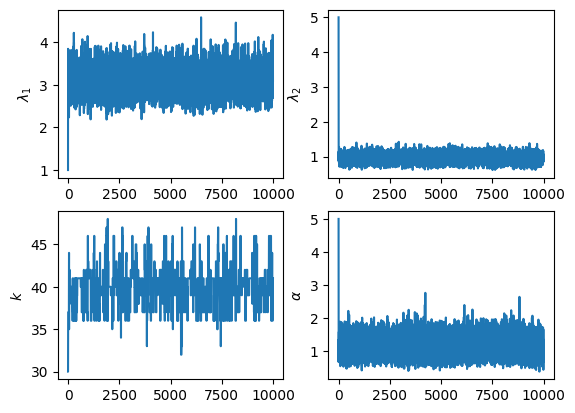

In [4]:
names = [r'$\lambda_1$', r'$\lambda_2$', r'$k$', r'$\alpha$']

for i in range(len(names)):
    plt.subplot(2,2, i+1)
    sns.lineplot(cadeias.iloc[:,i])
    plt.ylabel(names[i])

### Distribuições _a posteriori_ dos parâmetros

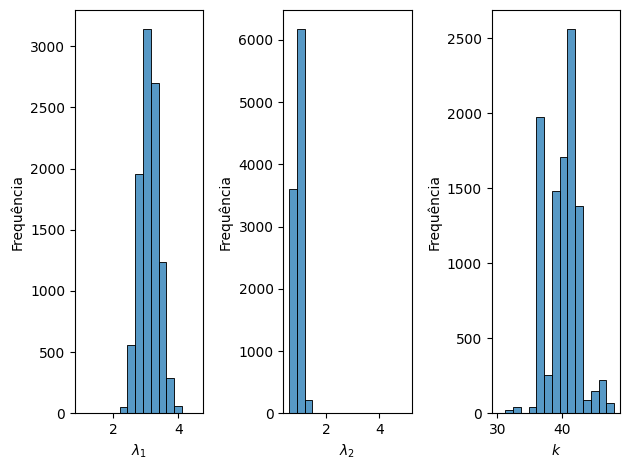

In [5]:
for i in range(len(names)-1):
    plt.subplot(1,3, i+1)
    sns.histplot(cadeias.iloc[:,i], bins = 'sturges')
    plt.xlabel(names[i])
    plt.ylabel("Frequência")
plt.tight_layout()

### Médias ergódicas

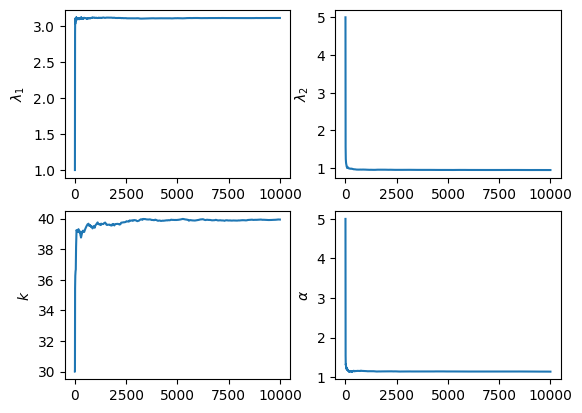

In [6]:
for i in range(len(names)):
    plt.subplot(2,2, i+1)
    sns.lineplot(np.cumsum(cadeias.iloc[:,i]) / np.arange(1, R+1))
    plt.ylabel(names[i])

## Estudo da sensibilidade em relação à escolha dos hiperparâmetros

In [7]:
cadeias = amostrador(30, 100, X, R)

cadeias.apply(np.mean)

Taxa de aceitação de k:  0.0602


lambda1     3.322805
lambda2     1.235186
k          38.174200
alpha       7.285499
dtype: float64

### Gráfico das cadeias geradas

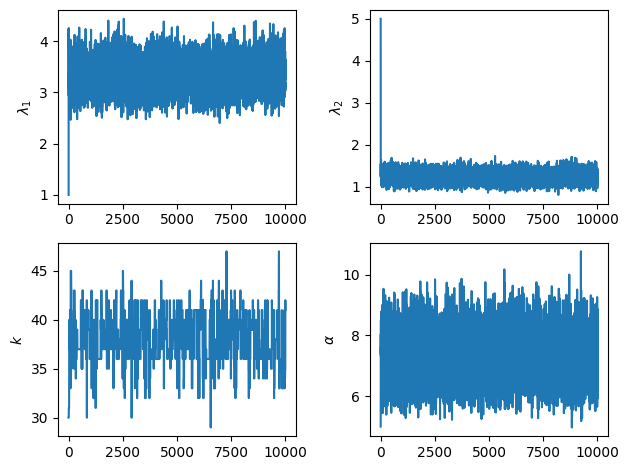

In [8]:
for i in range(len(names)):
    plt.subplot(2,2, i+1)
    sns.lineplot(cadeias.iloc[:,i])
    plt.ylabel(names[i])
plt.tight_layout()